<a href="https://colab.research.google.com/github/deekshitha411/bits_5d5/blob/main/CNN_Python_Implementation_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Why convolution?

In [4]:
from google.colab import drive #import drive utility
drive.mount('/content/drive')

Mounted at /content/drive


SPATIAL INVARIANCE or LOSS IN FEATURES

The spatial features of a 2D image are lost when it is flattened to a 1D vector input. Before feeding an image to the hidden layers of an MLP, we must flatten the image matrix to a 1D vector. This implies that all of the image's 2D information is discarded.

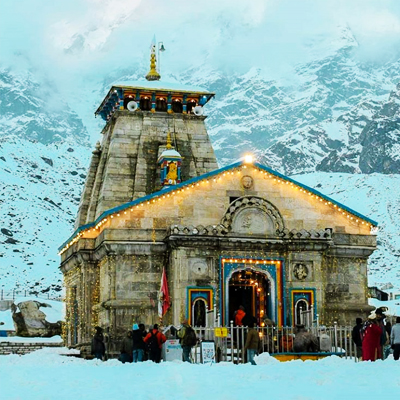

In [5]:
from google.colab.patches import cv2_imshow
import os, json, cv2, random #importing python libraries for diff operations

# IMPORTANT: This path is a Windows local path and will not work in Google Colab.
# You need to replace it with a valid path to your image in Google Drive.
# For example: im = cv2.imread('/content/drive/MyDrive/my_image.jpg')
im = cv2.imread("/content/temp.jpeg") # Placeholder - PLEASE UPDATE THIS PATH!

if im is None:
    print(f"Error: Image not found or cannot be loaded from the specified path. Please update the path to your image in Google Drive.")
else:
    cv2_imshow(im) #it correctly displays images in notebook

array([[[237, 231, 184],
        [239, 232, 182],
        [239, 233, 180],
        ...,
        [237, 230, 187],
        [237, 230, 187],
        [240, 231, 187]],

       [[237, 232, 183],
        [239, 233, 180],
        [239, 233, 180],
        ...,
        [236, 229, 186],
        [236, 230, 185],
        [238, 229, 185]],

       [[237, 232, 183],
        [239, 233, 180],
        [239, 233, 180],
        ...,
        [237, 231, 186],
        [237, 231, 186],
        [239, 230, 186]],

       ...,

       [[235, 222, 160],
        [235, 223, 159],
        [235, 223, 157],
        ...,
        [236, 223, 147],
        [236, 223, 147],
        [236, 223, 147]],

       [[237, 225, 161],
        [236, 224, 158],
        [236, 224, 158],
        ...,
        [234, 222, 144],
        [234, 222, 144],
        [234, 222, 144]],

       [[238, 225, 163],
        [237, 225, 161],
        [237, 225, 161],
        ...,
        [235, 223, 145],
        [233, 223, 145],
        [233, 223, 145]]], dtype=uint8)
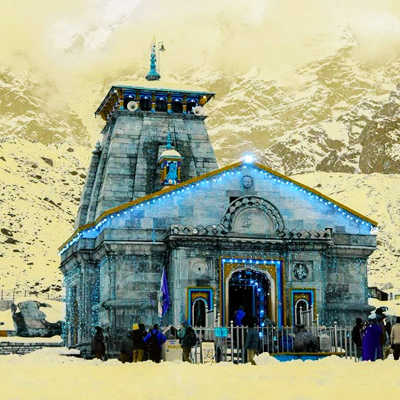

In [6]:
im

#### Sample Image

![title](https://aishack.in/static/img/tut/conv-gaussian-blur.jpg)

## Increase in  Parameter Issue

While increase in  Parameter Issue is not a big problem for the
MNIST dataset because the images are really small in size (28 × 28), what happens when we try to process larger images?

For example, if we have an image with dimensions 1,000 × 1,000, it will yield 1 million parameters for each node in the first hidden layer.

- So if the first hidden layer has 1,000 neurons, this will yield 1 billion parameters even in such a small network. You can imagine the computational complexity of optimizing 1 billion parameters after only the first layer.


### Fully Connected Neural Net

![title](https://www.researchgate.net/profile/Arvind-Sreenivas/publication/343263135/figure/fig3/AS:918277995905024@1595945943003/Fully-connected-layer.jpg)


### Local Connected Neural Net

![title](https://www.cs.toronto.edu/~lczhang/360/lec/w04/imgs/local.png)

[Source](https://www.cs.toronto.edu)


### Guide for design of a neural network architecture suitable for computer vision

- In the earliest layers, our network should respond similarly to the same patch, regardless of where it appears in the image. This principle is called translation invariance.
- The earliest layers of the network should focus on local regions, without regard for the contents of the image in distant regions. This is the locality principle. Eventually, these local representations can be aggregated to make predictions at the whole image level.

### Human Brain Visual Cortex processing

![](https://www.researchgate.net/profile/Bruno-Cessac/publication/233971662/figure/fig1/AS:393541936271366@1470839117205/Processing-steps-of-the-visual-stream-a-The-cellular-organization-of-the-retina-from.png)

In [8]:
# https://distill.pub/2017/feature-visualization/

# What are Convolutional Neural Networks?


Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars.


A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features. Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization.

## Visualizing the Process


## Simple Convolution

![](https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

## Matrix Calculation

![](https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

## Padding Concept
![](https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif)

## Stride Concept
![](https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif)

## Feature Accumulation
![](https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

## Feature Aggregation
![](https://miro.medium.com/max/2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif)

## Convolution Operation

![](https://cdn-media-1.freecodecamp.org/images/gb08-2i83P5wPzs3SL-vosNb6Iur5kb5ZH43)


[Source](https://https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

[Source](https://cs231n.github.io/convolutional-networks/)


# The CNN Complete Network Overview

![CNN Image](https://res.cloudinary.com/practicaldev/image/fetch/s--w1RZuJPn--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/i/1inc9c00m35q12lidqde.png)


# Best Place to Explore Kernels

[Kernels](https://setosa.io/ev/image-kernels/)

[Kernels as Edge Detector](https://aishack.in/tutorials/image-convolution-examples/)

### Features extracted by Kernels

![](https://cs231n.github.io/assets/cnn/weights.jpeg)

### Features > Patterns > Parts of Object
![](http://media5.datahacker.rs/2018/10/features_3images.png)

[Source](https://cs231n.github.io/convolutional-networks/)

## Intuition

Let's develop better intuition for how Convolutional Neural Networks (CNN) work. We'll examine how humans classify images, and then see how CNNs use similar approaches.

Let’s say we wanted to classify the following image of a dog as a Golden Retriever:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377b77_dog-1210559-1280/dog-1210559-1280.jpg" width="500" height="500">

As humans, how do we do this?

One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog.

In this case, we might break down the image into a combination of the following:

* A nose
* Two eyes
* Golden fur

These pieces can be seen below:

As humans, how do we do this?

One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog.

In this case, we might break down the image into a combination of the following:

* A nose
* Two eyes
* Golden fur

These pieces can be seen below:


<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bdb_screen-shot-2016-11-24-at-12.49.08-pm/screen-shot-2016-11-24-at-12.49.08-pm.png" width="250" height="250">
<center>The eye of the dog.</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bed_screen-shot-2016-11-24-at-12.49.43-pm/screen-shot-2016-11-24-at-12.49.43-pm.png" width="250" height="250">
<center>The nose of the dog.</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bff_screen-shot-2016-11-24-at-12.50.54-pm/screen-shot-2016-11-24-at-12.50.54-pm.png" width="250" height="250">
<center>The fur of the dog.</center>

### Going One Step Further

But let’s take this one step further. How do we determine what exactly a nose is? A Golden Retriever nose can be seen as an oval with two black holes inside it. Thus, one way of classifying a Retriever’s nose is to to break it up into smaller pieces and look for black holes (nostrils) and curves that define an oval as shown below:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c52_screen-shot-2016-11-24-at-12.51.47-pm/screen-shot-2016-11-24-at-12.51.47-pm.png">
<center>A curve that we can use to determine a nose</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c68_screen-shot-2016-11-24-at-12.51.51-pm/screen-shot-2016-11-24-at-12.51.51-pm.png">
<center>A nostril that we can use to classify the nose of the dog</center>

Broadly speaking, this is what a CNN learns to do. It learns to recognize basic lines and curves, then shapes and blobs, and then increasingly complex objects within the image. Finally, the CNN classifies the image by combining the larger, more complex objects.

In our case, the levels in the hierarchy are:

* Simple shapes, like ovals and dark circles
* Complex objects (combinations of simple shapes), like eyes, nose, and fur
* The dog as a whole (a combination of complex objects)

With deep learning, we don't actually program the CNN to recognize these specific features. Rather, the CNN learns on its own to recognize such objects through forward propagation and backpropagation!

It's amazing how well a CNN can learn to classify images, even though we never program the CNN with information about specific features to look for.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cb19d_heirarchy-diagram/heirarchy-diagram.jpg)
<center>An example of what each layer in a CNN might recognize when classifying a picture of a dog</center>

A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

Once again, the CNN **learns all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for.

A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

Once again, the CNN **learns all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for.

# Python Implementation

To classify given image in to 10 classes of
'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

In [9]:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
!pip install tensorflow
!pip install keras

In [11]:
import keras

In [12]:
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#50000 data in training and 10000 data in testing

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [13]:
x_train.shape

(50000, 32, 32, 3)

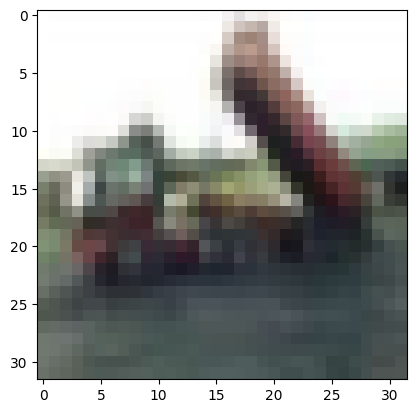

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.squeeze(x_train[2]))

### 2. Visualize the First 24 Training Images

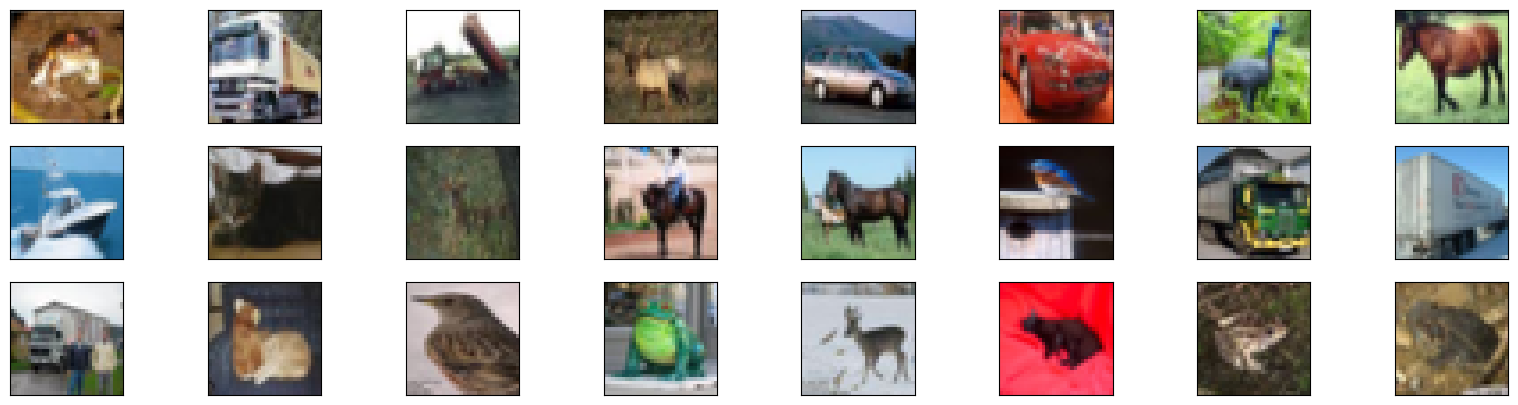

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20,5))
for i in range(24):
    ax = fig.add_subplot(3, 8, i + 1,yticks=[], xticks=[] )
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the
same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on
the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [16]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [17]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [18]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [ ]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

In [19]:
from keras.utils import to_categorical
from tensorflow import keras
import numpy as np

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)#Conver the array value(Class vector) into matrix
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape) # Output like How many number of images, image size, image size, How mant channels(RGB)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

#16 filters with 2X2 kernel with padding size same as iput and output

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3)) # 30% nurons are deactivated to avoid overfitting

model.add(Flatten())# Coverting data into 1D array

model.add(Dense(500, activation='relu'))#500 nurons with relu AF

model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

### 6. Compile the Model

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 7. Train the Model

In [22]:
from keras.callbacks import ModelCheckpoint #callbacks are used to save the best weights for our model

# train the model
# checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=2,
          validation_data=(x_valid, y_valid),
          verbose=0, shuffle=True)

### 8. Load the Model with the Best Validation Accuracy

In [23]:
# model.load_weights('model.weights.best.hdf5')

### 9. Visualize Some Predictions

In [24]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


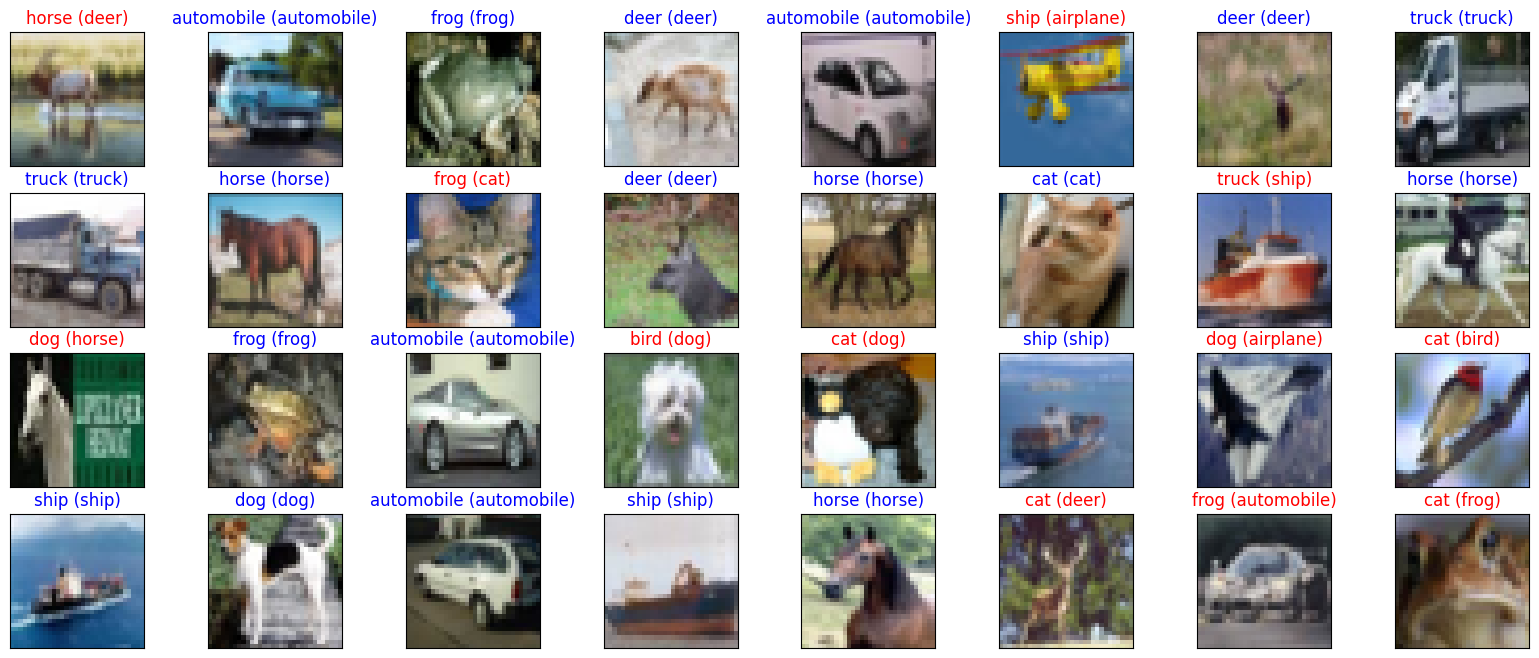

In [25]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [26]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 58.4800%


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import tensorflow as tf
from keras.preprocessing import image
img = tf.keras.utils.load_img("/content/drive/MyDrive/My Data/06-Advance Data Science/AIF-1-DL-Foundation-Course-on-CNN/Capture.JPG", target_size=(32,32,3))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
score

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/My Data/06-Advance Data Science/AIF-1-DL-Foundation-Course-on-CNN/Capture.JPG'

In [ ]:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
cifar10_labels[np.argmax(score)]


In [ ]:
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

# The typo 'y_hay' has been corrected to 'y_hat'
# Also, y_test and y_hat need to be converted to class labels (argmax) for classification_report and confusion_matrix
print(classification_report(np.argmax(y_test[:100], axis=1), np.argmax(y_hat[:100], axis=1)))

sns.heatmap(confusion_matrix(np.argmax(y_test[:100], axis=1), np.argmax(y_hat[:100], axis=1)), annot=True, cmap='coolwarm')